In [1]:
import pandas as pd
import numpy as np
from time import process_time
import ast
import re
import regex
import csv
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
def read_data(path):
    return pd.read_csv(path)

In [3]:
def preprocess_data(text):
    text = " ".join([word for word in text.split() if word not in punctuation])
    return text.strip()

In [4]:
training_path = "../dataset/original-dataset/marathi-training-data.csv"
training_data = read_data(training_path)
training_data

,text,label
0,"प्रा . प्रताप हरिदास : होय , मला वाटते की हा ए...",com_tech
1,"तर , विशिष्ट गोष्टींद्वारे , ठराविक कायद्यांद्...",bioche
2,- - - - - - - - - - - - - - - - - - - - - - - ...,cse
3,"तर , आपला अर्धा चिन्ह 9 वाजता असेल .",phy
4,"म्हणून , मी असे म्हणालो की जर शेकडो , हजारो कि...",phy
...,...,...
41992,"जरी आपण डेटा कूटबद्ध केला , तरीही हा मुख्य व्य...",cse
41993,"ते म्हणतात - "" ज्याला पाहण्यासाठी डोळे , ऎकण्य...",com_tech
41994,"प्रथम क्रोनोलॉजिकल , क्रॉनोलॉजी म्हणजे आपल्याल...",com_tech
41995,"त्या थोड्या तपशीलावर येईल , जेणेकरून संपूर्ण ग...",bioche


In [5]:
training_data['text'] = training_data.text.apply(lambda x: preprocess_data(x))
training_data

,text,label
0,प्रा प्रताप हरिदास होय मला वाटते की हा एक महत्...,com_tech
1,तर विशिष्ट गोष्टींद्वारे ठराविक कायद्यांद्वारे...,bioche
2,म्हणून डेटा कुठे स्थित आहे जेथे विस्तार इत्याद...,cse
3,तर आपला अर्धा चिन्ह 9 वाजता असेल,phy
4,म्हणून मी असे म्हणालो की जर शेकडो हजारो किंवा ...,phy
...,...,...
41992,जरी आपण डेटा कूटबद्ध केला तरीही हा मुख्य व्यवस...,cse
41993,ते म्हणतात ज्याला पाहण्यासाठी डोळे ऎकण्यासाठी ...,com_tech
41994,प्रथम क्रोनोलॉजिकल क्रॉनोलॉजी म्हणजे आपल्याला ...,com_tech
41995,त्या थोड्या तपशीलावर येईल जेणेकरून संपूर्ण गोष...,bioche


In [6]:
x_train = training_data.text.values.tolist()
y_train = training_data.label.values.tolist()

In [8]:
val_path = "../dataset/original-dataset/marathi-validation-data.csv"
val_data = read_data(val_path)
val_data

,text,label
0,1 ची ओळ .,cse
1,"तर , ही एक टॉवर आहे जी टॉवरवर निश्चित केली जात...",phy
2,"तर , थ्रेडच्या परतीच्या स्थितीस पास करण्यासाठी...",cse
3,आपण लोक शोधत आहात जे आपल्यासाठी काहीतरी करू शक...,com_tech
4,लिनक्स कर्नल अनुसूचीतकरणामध्ये अशी तंत्र असण्य...,cse
...,...,...
3775,"नंतर वृद्धत्व , व्हॉट मोठ्या प्रमाणात फ्रॉन 12...",bioche
3776,आणि मग सुद्धा आपल्याला काही सेकंदांनंतर माहित ...,phy
3777,"तर , आपण ELF शीर्षलेखासह प्रारंभ करू .",cse
3778,"तर , त्या क्रॉस्टची जाडी आहे .",phy


In [9]:
val_data['text'] = val_data.text.apply(lambda x: preprocess_data(x))
val_data

,text,label
0,1 ची ओळ,cse
1,तर ही एक टॉवर आहे जी टॉवरवर निश्चित केली जाते ...,phy
2,तर थ्रेडच्या परतीच्या स्थितीस पास करण्यासाठी प...,cse
3,आपण लोक शोधत आहात जे आपल्यासाठी काहीतरी करू शकतात,com_tech
4,लिनक्स कर्नल अनुसूचीतकरणामध्ये अशी तंत्र असण्य...,cse
...,...,...
3775,नंतर वृद्धत्व व्हॉट मोठ्या प्रमाणात फ्रॉन 12 र...,bioche
3776,आणि मग सुद्धा आपल्याला काही सेकंदांनंतर माहित ...,phy
3777,तर आपण ELF शीर्षलेखासह प्रारंभ करू,cse
3778,तर त्या क्रॉस्टची जाडी आहे,phy


In [9]:
x_val = val_data.text.values.tolist()
y_val = val_data.label.values.tolist()

In [10]:
def custom_analyzer(text):
    # extract words of at least 1 letters
    words = regex.findall(r'\w{1,}', text)
    for w in words:
        yield w

        
def bow_vectorize(x_train, x_val):
        bow_vectorizer = CountVectorizer(analyzer=custom_analyzer)
        bow_vectorizer.fit(x_train)
        bow_x_train = bow_vectorizer.transform(x_train)
        bow_x_val = bow_vectorizer.transform(x_val)
        return bow_vectorizer, bow_x_train, bow_x_val

In [11]:
bow_vectorizer, bow_x_train, bow_x_val = bow_vectorize(x_train, x_val)
print(bow_x_train.shape)
print(bow_x_val.shape)

(41997, 52502)
(3780, 52502)


In [12]:
def get_embedding_matrix(embedding_path, vocab):
    cnt = 0
    words = []
    embeddings = []
    vocab_words = set(vocab.keys())
    embedding_matrix = np.zeros((len(vocab), 300))
    embedding_file = open(embedding_path, 'r')
    for row in embedding_file:
        row = row.split()
        word = row[0].strip()
        if word in vocab_words:
            wv = np.asarray(row[1:], dtype='float32')
            if len(wv) == 300:
                words.append(word)
                embeddings.append(wv)
                embedding_matrix[vocab[word]] = wv
                cnt = cnt + 1
    print(cnt)
    embedding_file.close()
    return embedding_matrix, words, embeddings

In [1]:
import pandas as pd
import numpy as np

In [3]:
def get_words(embedding_path):
    words = []
    embeddings = []
    embedding_file = open(embedding_path, 'r')
    for row in embedding_file:
        row = row.split()
        wv = np.asarray(row[1:], dtype='float32')
        if len(wv) == 300:
            words.append(row[0].strip())
            embeddings.append(wv)
    return words, embeddings

In [9]:
ft_embedding_path = "/home/eastwind/word-embeddings/fasttext/cc.mr.300.vec"
#ft_embedding_path = "/home/eastwind/word-embeddings/fasttext/TechDofication.ft.skipgram.mr.300.vec"
words, embeddings = get_words(ft_embedding_path)

In [10]:
words[:10]

['.', '</s>', ',', "'", '-', 'आहे', ')', '(', 'आणि', ':']

In [17]:
indic_embedding_path = "/home/eastwind/word-embeddings/fasttext/indicnlp.ft.mr.300.vec"
indic_words = get_words(indic_embedding_path)
len(indic_words)

258414

In [20]:
indic_words = set(indic_words)
len(indic_words)

258414

In [22]:
intersection = ft_words & indic_words
union = ft_words | indic_words

In [23]:
print(len(intersection))
print(len(union))

201109
903111


In [25]:
diff = indic_words-ft_words
print(len(diff))

57305


In [26]:
vocab_words = bow_vectorizer.get_feature_names()

In [32]:
new_words = []
for word in vocab_words:
    if word in intersection:
        new_words.append(word)

In [36]:
for word in marathi_words:
    if word not in intersection:
        print(word)

NameError: name 'marathi_words' is not defined

In [34]:
print(len(intersection))
print(len(vocab_words))
print(len(new_words))

201109
52502
28841


In [14]:
embedding_path = "/home/eastwind/word-embeddings/fasttext/cc.mr.300.vec"
embedding_matrix, words, embeddings = get_embedding_matrix(embedding_path, vocab)
print(len(words))
print(len(embeddings))
embedding_matrix.shape

33286
33286
33286


(52502, 300)

In [15]:
def visualize_embeddings(words, embeddings):
        vectors = []

        # convert both lists into numpy vectors for reduction
        embeddings = np.asarray(embeddings)
        words = np.asarray(words)

        vectors = np.asarray(vectors)
        tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
        vectors = tsne_model.fit_transform(embeddings)
        print(vectors.shape)

        x = []
        y = []
        for value in vectors:
            x.append(value[0])
            y.append(value[1])

        plt.figure() 
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.annotate(words[i],
                         xy=(x[i], y[i]),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')
        plt.show()

(10, 2)


<IPython.core.display.Javascript object>


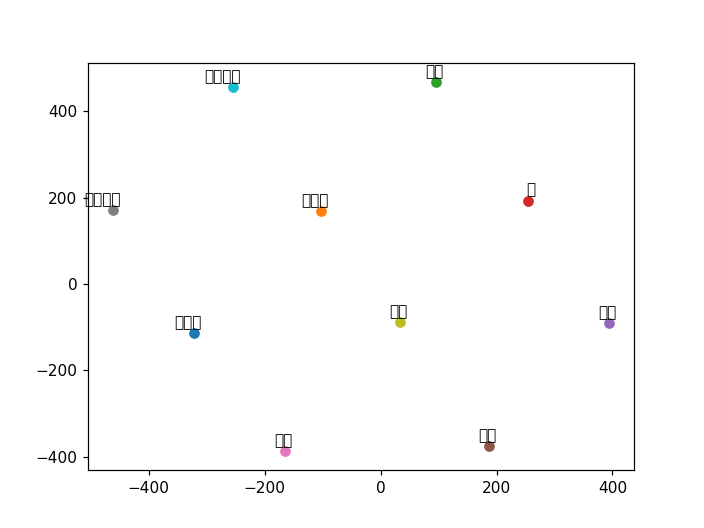

In [20]:
visualize_embeddings(words[:10], embeddings[:10])

In [70]:
def analyze_vocab(vocab_words):
    numbers = []
    english_words = []
    marathi_words = []
    for word in vocab_words:
        if re.match('\d+', word):
            numbers.append(word)
        elif re.match('[a-zA-Z]+', word):
            english_words.append(word)
        else:
            marathi_words.append(word)
    return numbers, english_words, marathi_words

In [71]:
vocab_words = bow_vectorizer.get_feature_names()

In [72]:
print("Total Vocabulary: ", len(vocab_words))
numbers, english_words, marathi_words = analyze_vocab(vocab_words)
print(len(numbers))
print(len(english_words))
print(len(marathi_words))

Total Vocabulary:  52502
451
1049
51002


In [59]:
numbers

['0',
 '00',
 '000',
 '0000',
 '0005',
 '001',
 '002',
 '005',
 '01',
 '011',
 '016',
 '02',
 '021',
 '025',
 '025xC',
 '025xM',
 '029',
 '03',
 '033',
 '036',
 '038',
 '04',
 '043',
 '045',
 '05',
 '052',
 '055',
 '056',
 '06',
 '068',
 '07',
 '08',
 '0800',
 '088',
 '09',
 '0s',
 '0x0',
 '0x00124345',
 '0x12345',
 '0x1f0',
 '0x1f2',
 '0x1f7',
 '0x7c00',
 '0x8',
 '0x80',
 '0x80000000',
 '0x80124345',
 '0xFE',
 '0xf000',
 '0xfff0',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000',
 '1000IU',
 '100ओळ',
 '101',
 '1010',
 '102',
 '1024',
 '103',
 '1030',
 '105',
 '108',
 '10ºC',
 '11',
 '110',
 '1100',
 '11000',
 '111',
 '1125',
 '114',
 '115',
 '11ट',
 '12',
 '120',
 '1200',
 '121',
 '122',
 '1220',
 '124',
 '125',
 '127',
 '128',
 '13',
 '130',
 '1300',
 '133',
 '134',
 '135',
 '1377',
 '138',
 '139',
 '14',
 '140',
 '1400',
 '142',
 '1424',
 '1450',
 '146',
 '149',
 '15',
 '150',
 '1500',
 '15000',
 '150000',
 '151',
 '1545',
 '157',
 '159',
 '1590',
 '16',
 '160',
 '1670'

In [50]:
marathi_words[:30]

['δδ',
 'δδt',
 'δवाढतो',
 'ε',
 'εi',
 'ηi',
 'ρ',
 'σ',
 'σD',
 'σμ',
 'ω',
 'अ',
 'अँकर',
 'अँगल',
 'अँग्स्ट्रॉम्स',
 'अँग्स्ट्रॉम्सपेक्षा',
 'अँट',
 'अँटनीने',
 'अँटनीला',
 'अँटिबायोटिक्स',
 'अँटिमनी',
 'अँटिरूम',
 'अँटी',
 'अँटीऑक्सिडंट',
 'अँटीऑक्सिडंट्स',
 'अँटीऑक्सिडेंट',
 'अँटीजन',
 'अँटीजेनशी',
 'अँटीबायोटिक',
 'अँटीबायोसिस']

In [75]:
for text, label in list(zip(x_train, y_train)):
    if "εi" in text:
        print(label)
        #print("text: {}, label: {}\n\n".format(text, label))

com_tech
com_tech
com_tech
com_tech
com_tech
